# Start Yolov5
yolov5 를 시작하면서 사전에 필요한 파일들부터 어떻게 준비하는지 확인

### 새로운 가상환경 준비

In [ ]:
'''
새로운 가상환경 만들기
conda create -n yolov5 python=3.8
conda activate yolov5

쥬피터 연결
conda install ipykernel
python -m ipykernel install —user —name 가상환경이름 --display-name 쥬피터이름

yolov5 설치
git clone https://github.com/ultralytics/yolov5
cd yolov5
pip install -r requirements.txt

convert2Yolo 설치
cd ..
git clone https://github.com/ssaru/convert2Yolo.git
'''

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import os
import torch
import zipfile

## 1. 준비
### gpu 연결

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# gpu연산 설정
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')
print("cuda number : ", os.environ["CUDA_VISIBLE_DEVICES"])
print("cuda device : ", torch.cuda.device_count())

cuda:1 is available
cuda number :  1
cuda device :  1


### 이미지 압축해제
만약 이미지만 있고 annotation이 없다면 cvat에서 polygon을 만들어준다.  
polygon을 만들어주면 bbox와 segmentation이 모두 생성된다.

In [3]:
zipfile.ZipFile('../starbucks.zip').extractall()

### .names 파일 생성
메모장 또는 파이참으로 새 파일을 만들어서 확장자를 .names로 저장하면 된다.  
.names 파일 안에는 이미지를 분류하는 label을 한줄씩 입력하면 된다.  
ex) class.names  
person  
animal  
flower

### convert2Yolo 를 이용해 annotation.json을 각각의 txt 파일로 변환

cd convert2Yolo/

In [ ]:
'''
python3 example.py --datasets COCO \
> --img_path ../02_coco_yolov5/images \
> --label ../02_coco_yolov5/annotations/annotation_default.json \
> --convert_output_path ../02_coco_yolov5/annotations/ \
> --img_type ".jpg" \
> --manifest_path ./ \
> --cls_list_file ../02_coco_yolov5/class.names
'''

### .yaml 파일 만들기

cd 현재 작업하는 경로로 이동해서 yaml파일 만듣기

In [9]:
pwd

'/home/sona/02_coco_yolov5'

In [ ]:
'''
cd /home/sona/02_coco_yolov5
vi custom.yaml

yaml 파일에 들어가야 하는 내용
1. train data 경로
2. valid data 경로
3. 클래스 개수
4. 클래스 이름

Ex)
train: ./images/train    # train 경로
val: ./images/val        # val 경로

nc: 2                                            # class 개수
names: ['person', 'animal']                      # class 이름
'''

### 디렉토리 설정
> 프로젝트 파일  
    >> images
        >>>train (.jpg)   
        >>>val   (.jpg)
    
>>labels
>>>train (.txt)   
>>>val  (.txt)

>>class.names   

>>custom.yaml  

### Train
#### conda activate yolov5 했는지 확인
cd ../yolov5

가장 가벼운 모델인 yolov5s 사용  /  yolov5s.yaml 에서 nc : class개수로 수정필요없음 >> custom.yaml에서 지정해줬기 때문

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbUdXRr%2Fbtq3Nmscgll%2FWEIvYEiE1gxHj7mS4Yk0KK%2Fimg.png" width="1000">


In [ ]:
import matplotlib.pyplot as plt

a = plt.imread('/home/sona/yolov5/runs/train/exp4/confusion_matrix.png')
plt.figure(figsize=(15, 15))
plt.imshow(a)

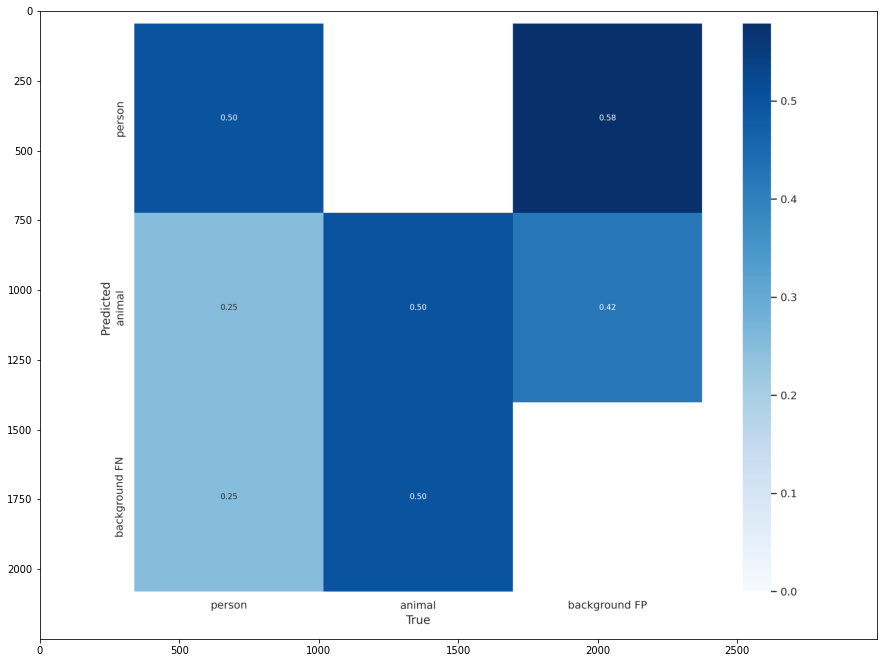

In [33]:
import matplotlib.pyplot as plt

a = plt.imread('/home/sona/yolov5/runs/train/exp3/confusion_matrix.png')
plt.figure(figsize=(15, 15))
plt.imshow(a)

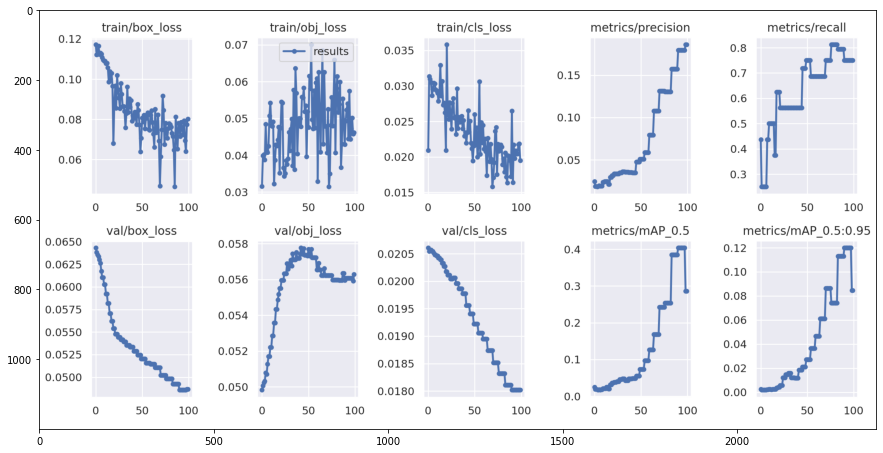

In [31]:
a = plt.imread('/home/sona/yolov5/runs/train/exp4/results.png')
plt.figure(figsize=(15, 15))
plt.imshow(a)

### Val

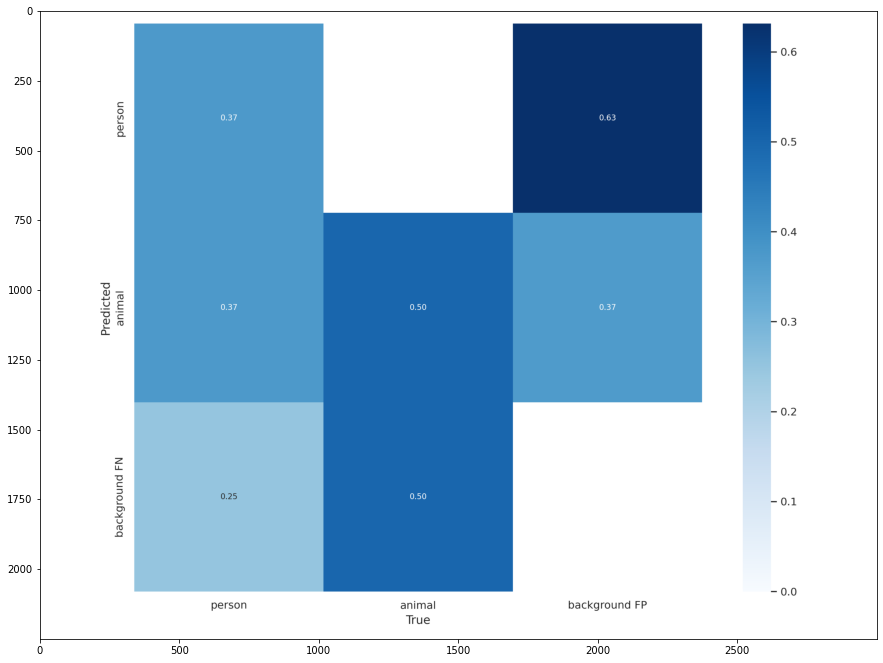

In [4]:
v = plt.imread('/home/sona/yolov5/runs/val/exp/confusion_matrix.png')
plt.figure(figsize=(15, 15))
plt.imshow(v)

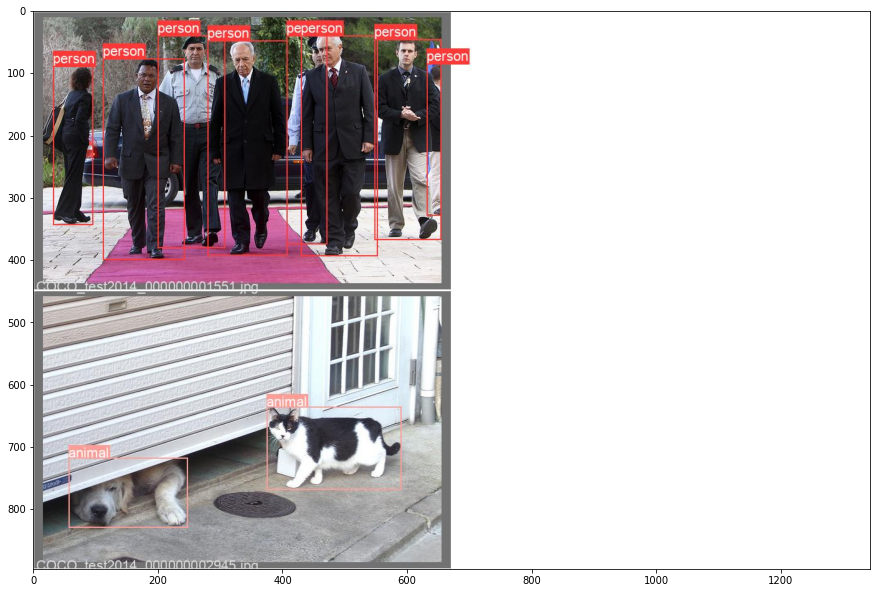

In [19]:
v = plt.imread('/home/sona/yolov5/runs/val/exp/val_batch0_labels.jpg')
plt.figure(figsize=(15, 15))
plt.imshow(v)

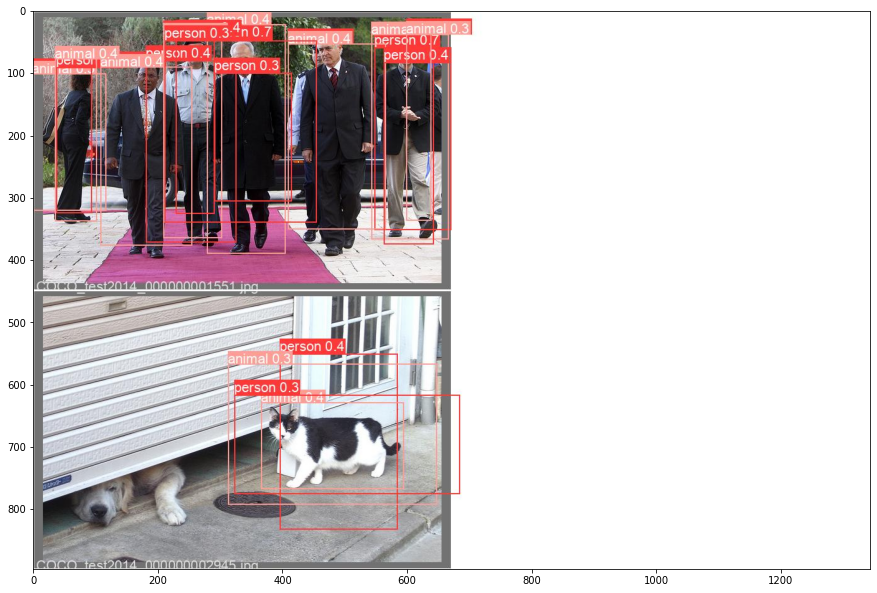

In [20]:
p = plt.imread('/home/sona/yolov5/runs/val/exp/val_batch0_pred.jpg')
plt.figure(figsize=(15, 15))
plt.imshow(p)

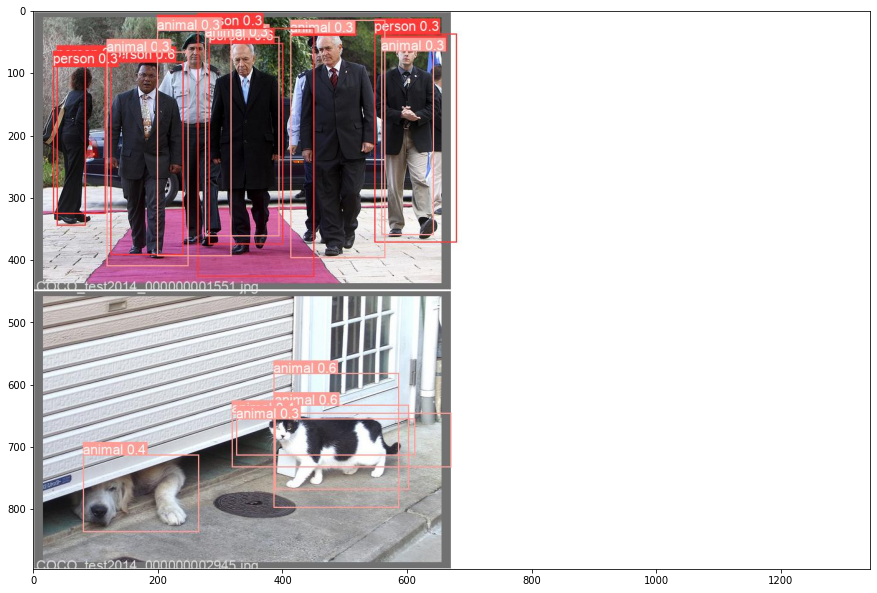

In [34]:
a = plt.imread('/home/sona/yolov5/runs/train/exp4/val_batch0_pred.jpg')
plt.figure(figsize=(15, 15))
plt.imshow(a)

### Test (Inference)

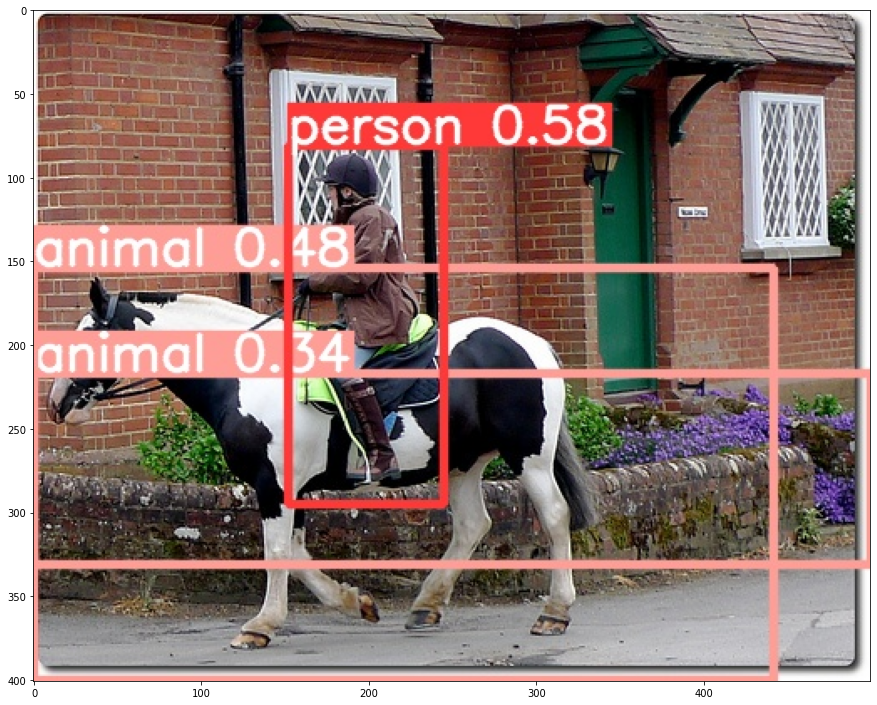

In [21]:
v = plt.imread('/home/sona/yolov5/runs/detect/exp/COCO_test2014_000000001793.jpg')
plt.figure(figsize=(15, 15))
plt.imshow(v)